In [1]:
!pip install transformers datasets diffusers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 17.8 MB/s eta 0:00:00


In [2]:
# https://huggingface.co/docs/transformers/model_sharing
# from huggingface_hub import notebook_login

# notebook_login()

In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
from diffusers import StableDiffusionPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

### Full Fine Tuning Model

In [6]:
pipeline = StableDiffusionPipeline.from_pretrained(
    "metamath/stable-diffusion-v1-5-finetune-pokemon-blip",
)

model_index.json:   0%|          | 0.00/675 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/796 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [7]:
pipeline.to(device);

In [8]:
pipeline_output = pipeline(
    prompt=["a very cute looking cartoon character with big eyes"],
    num_inference_steps=20,
    generator=torch.manual_seed(101)
)

A = pipeline_output.images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

In [9]:
pipeline_output = pipeline(
    prompt=["Yoda"],
    num_inference_steps=20,
    generator=torch.manual_seed(101)
)
B = pipeline_output.images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

### LoRA Fine Tuning Model

In [10]:
pipeline_lora = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
pipeline_lora.to(device);

In [12]:
pipeline_output = pipeline_lora(
    prompt=["a very cute looking cartoon character with big eyes"],
    num_inference_steps=20,
    generator=torch.manual_seed(101)
)

C = pipeline_output.images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

In [13]:
pipeline_output = pipeline_lora(
    prompt=["Yoda"],
    num_inference_steps=20,
    generator=torch.manual_seed(101)
)
D = pipeline_output.images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

#### LoRA Loading

In [14]:
pipeline_lora.load_lora_weights(
    pretrained_model_name_or_path_or_dict="metamath/stable-diffusion-v1-5-lora-finetune-pokemon-blip",
    weight_name="pytorch_lora_weights.safetensors",
    adapter_name="pokemon"
)

pytorch_lora_weights.safetensors:   0%|          | 0.00/3.23M [00:00<?, ?B/s]

In [15]:
lora_scale= 0.9
pipeline_output = pipeline_lora(
    prompt=["a very cute looking cartoon character with big eyes"],
    num_inference_steps=20,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

E = pipeline_output.images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

In [16]:
lora_scale= 0.9
pipeline_output = pipeline_lora(
    prompt=["Yoda"],
    num_inference_steps=20,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(101)
)

F = pipeline_output.images[0]


  0%|          | 0/20 [00:00<?, ?it/s]

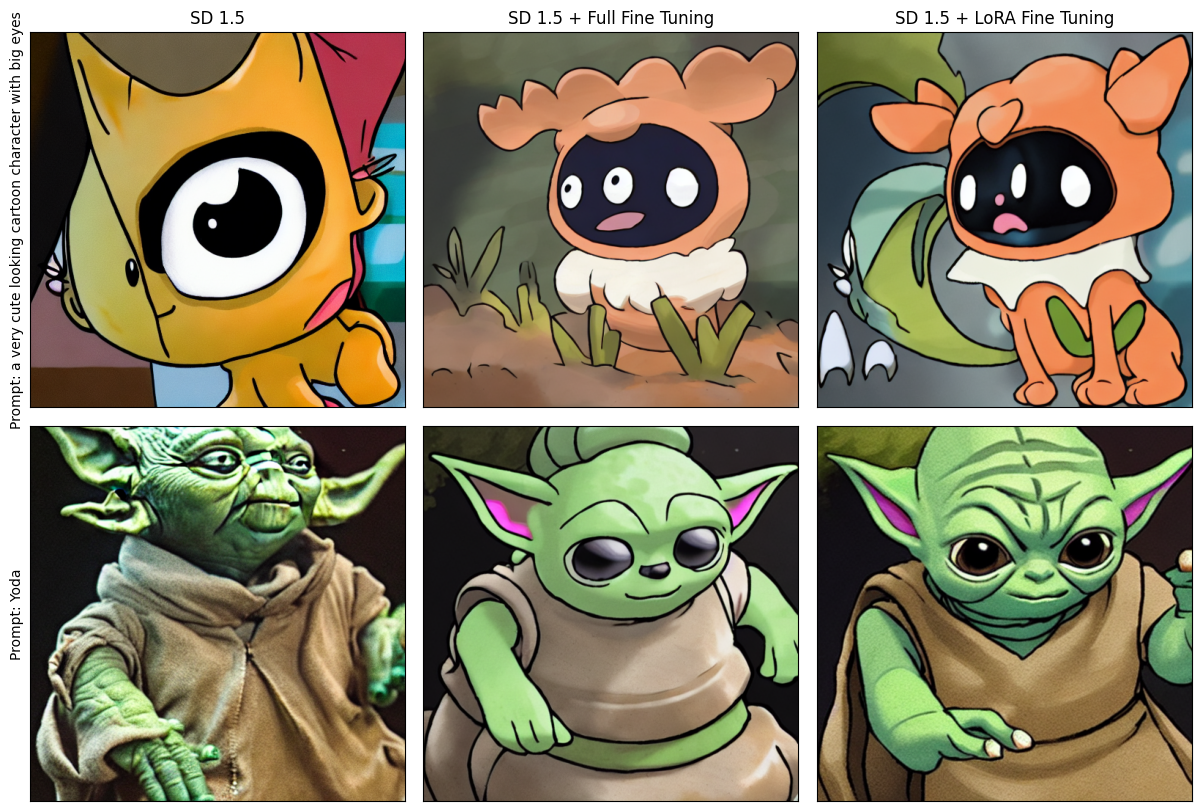

In [22]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, ncols=3)

ax[0,0].imshow(C)
ax[0,0].set_title('SD 1.5')
ax[0,0].set_ylabel('Prompt: a very cute looking cartoon character with big eyes')
ax[0,0].set_xticks([]); ax[0,0].set_yticks([])

ax[1,0].imshow(D)
ax[1,0].set_xticks([]); ax[1,0].set_yticks([])
ax[1,0].set_ylabel('Prompt: Yoda')

ax[0,1].imshow(A)
ax[0,1].set_title('SD 1.5 + Full Fine Tuning')
ax[0,1].set_xticks([]); ax[0,1].set_yticks([])

ax[1,1].imshow(B)
ax[1,1].set_xticks([]); ax[1,1].set_yticks([])

ax[0,2].imshow(E)
ax[0,2].set_title('SD 1.5 + LoRA Fine Tuning')
ax[0,2].set_xticks([]); ax[0,2].set_yticks([])

ax[1,2].imshow(F)
ax[1,2].set_xticks([]); ax[1,2].set_yticks([])

plt.subplots_adjust(wspace=0.05, hspace=0.05)

plt.show()